In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

url = r'C:\Users\ilesanmi\Desktop\ipny\AI LEAD\PRojects\Bank- ALL\Bank_Subscription_Project\bank_data.csv'
bank = pd.read_csv(url)

In [3]:
bank.shape

(41188, 21)

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# DEALING WITH MISSING VALUES

In [7]:
#check for missing values

bank.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [8]:
# #the missing columns are:
#job                330
# marital             80
# education         1731
# default           8597
# housing            990
# loan               990

In [9]:
#checking for jobs
bank['job'].value_counts()
#bank['job'].unique()
bank['job'].mode()

#the highest job is admin

0    admin.
dtype: object

In [10]:
#checking for marital
bank['marital'].value_counts()
bank['marital'].mode()

#bank['age'].mode() ==31

#judging by the age and the mode of marriage,
#i feel it's safe to fix the missing data with married

0    married
dtype: object

In [11]:
#checking for education
bank['education'].value_counts()
#bank['education'].mode()

#the university.degree has more frequencies

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [12]:
#checking for defaults
bank['default'].value_counts()
#bank['default'].mode()

#its a moore of NOOO

no     32588
yes        3
Name: default, dtype: int64

In [13]:
#checking for housing
bank['housing'].value_counts()
#bank['housing'].mode()

#safe to yes

yes    21576
no     18622
Name: housing, dtype: int64

In [14]:
#checking for loan

bank['loan'].value_counts()
#bank['loan'].mode()

#its a NOO

no     33950
yes     6248
Name: loan, dtype: int64

In [15]:
bank.fillna(value = {'loan':list(bank['loan'].mode())[0], 'housing': list(bank['housing'].mode())[0], 'default': list(bank['default'].mode())[0], 'education':list(bank['education'].mode())[0], 'job': list(bank['job'].mode())[0], 'marital': list(bank['marital'].mode())[0]}, inplace = True)

In [16]:
datasetA = bank

In [17]:
datasetA.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [18]:
d_trial = datasetA #backup
d_trial.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# VISUALISATION

### some basic things to see

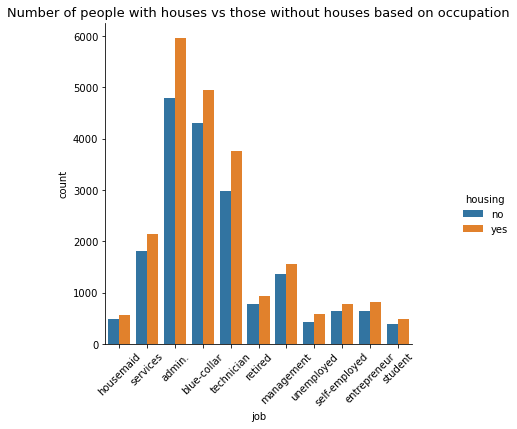

In [22]:
sns.catplot(x="job", data=d_trial,hue="housing", kind="count", legend = 'best' )
plt.title('Number of people with houses vs those without houses based on occupation', fontsize = 13)
plt.xticks(rotation=45)
plt.show()

C:\Users\ilesanmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


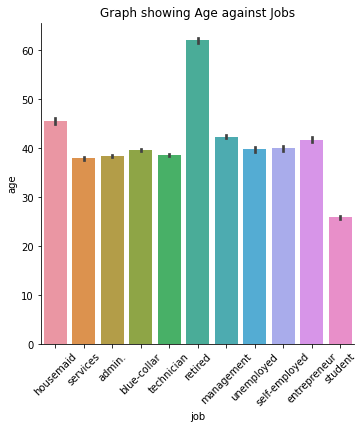

In [20]:
x = 'job'
y = 'age'
sns.catplot(x,y, data = d_trial, kind = 'bar')
plt.title("Graph showing Age against Jobs")
plt.xticks(rotation=45)
plt.show()

# ENCODING

In [49]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [50]:
y = 'y'
features = d_trial.drop(y, axis = 1)
target = d_trial[y].values
features_encoded = features.apply(enc.fit_transform)
target_encoded = enc.fit_transform(target)

In [51]:
#features_encoded

# SPLIT

In [52]:
x_tr, x_test, y_tr, y_test = train_test_split(features_encoded, target_encoded, random_state = 0)

# SCALING

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_tr_scaled = scaler.fit_transform(x_tr)
x_test_scaled = scaler.transform(x_test)

In [54]:
#so i have:

#for unscaled: x_tr, x_test, y_tr, y_test
#for scaled: x_tr_scaled, x_test_scaled, y_tr, y_test

# MODEL

In [55]:
#x_tr

# NEEDED FUNCTIONS

In [56]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

In [57]:
#default value for incase i want to input another

def logistic_regression_model( x_tr, x_te, y_tr, y_te, C = 1.0):
    log_reg = LogisticRegression(C = C)
    log_reg.fit(x_tr, y_tr)
    print('training accuracy: ', log_reg.score(x_tr, y_tr))
    print('testing accuracy: ', log_reg.score(x_te, y_te))
    
    return log_reg

In [58]:
#manipulating values of C in Logistic Regression
def Log_reg_Manip_display(x_tr, x_test, y_tr, y_test):
    C_values = [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1]
    train_acc = []
    test_acc = []

    for c in C_values:
        log_reg1 = LogisticRegression(C = c)
        log_reg1.fit(x_tr, y_tr)
        train_acc.append(log_reg1.score(x_tr, y_tr))
        test_acc.append(log_reg1.score(x_test, y_test))

    
    #train_acc, test_acc, C_values = Log_reg_Manip(x_tr, x_test, y_tr, y_test)
    plt.plot(C_values, train_acc, label = "Train Accuracy")
    plt.plot(C_values, test_acc, label = "Test Accuracy")
    plt.xlabel('C values')
    plt.ylabel('Accuracies')
    plt.legend(loc = 'best')
    plt.show()

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

def cls_rprt_and_conf_matrix(x_tr, x_te, y_tr, y_te, C = 1):
    #log_reg = logistic_regression_model( x_tr, x_te, y_tr, y_te, C = 1.0)
    
    #having issue... 
    
    log_reg = LogisticRegression(C = C)
    log_reg.fit(x_tr, y_tr)
    #print('training accuracy: ', log_reg.score(x_tr, y_tr))
    #print('testing accuracy: ', log_reg.score(x_te, y_te))
    
    y_pred = log_reg.predict(x_te)
    #make predictions
    conf =confusion_matrix(y_te, y_pred)
    cls_report = classification_report(y_te, y_pred)
    print('confusion matrix: \n\n', conf, '\n\n')
    print('classification report: \n', cls_report)

In [60]:
#x_tr, x_test, y_tr, y_test

#x_tr_scaled
#x_test_scaled

## unscaled data report



In [61]:
logistic_regression_model(x_tr, x_test, y_tr, y_test)

training accuracy:  0.9078696060341199
testing accuracy:  0.9131785957074876


C:\Users\ilesanmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

C:\Users\ilesanmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ilesanmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

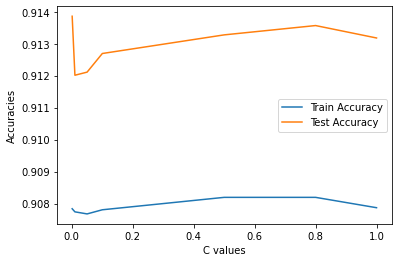

In [62]:
Log_reg_Manip_display(x_tr, x_test, y_tr, y_test)


In [63]:
cls_rprt_and_conf_matrix(x_tr, x_test, y_tr, y_test)

confusion matrix: 

 [[8907  232]
 [ 662  496]] 


classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9139
           1       0.68      0.43      0.53      1158

    accuracy                           0.91     10297
   macro avg       0.81      0.70      0.74     10297
weighted avg       0.90      0.91      0.90     10297



C:\Users\ilesanmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## scaled data report




In [64]:
logistic_regression_model(x_tr_scaled, x_test_scaled, y_tr, y_test)

training accuracy:  0.909358712893723
testing accuracy:  0.9145382150140817


LogisticRegression()

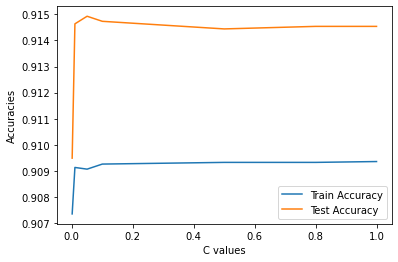

In [65]:
Log_reg_Manip_display(x_tr_scaled, x_test_scaled, y_tr, y_test)


In [66]:
cls_rprt_and_conf_matrix(x_tr_scaled, x_test_scaled, y_tr, y_test)


confusion matrix: 

 [[8897  242]
 [ 638  520]] 


classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9139
           1       0.68      0.45      0.54      1158

    accuracy                           0.91     10297
   macro avg       0.81      0.71      0.75     10297
weighted avg       0.90      0.91      0.91     10297



# DATA IMBALANCE

In [67]:
d_trial['y'].value_counts() #imbalance

no     36548
yes     4640
Name: y, dtype: int64

### methods to handle imbalance data:
1. Under sampling the majority class
2. Over sampling the minority class ...
3. Over sampliing the minority using SMOTE
4. Ensemble method
5. Focal loss

## 1. Under sampling the majority class

In [68]:
#undersampling

imbal = d_trial

In [69]:

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

imbal_enc = imbal.apply(enc.fit_transform)

In [70]:
#imbal_enc.y



In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [72]:
#function receives encoded dataframe and then the needed label

def udersampling_d_majority_class(encoded_df, label):
    y = label
    zeros = encoded_df[encoded_df[y] == 0] #the oversampled
    ones = encoded_df[encoded_df[y] == 1] #the undersampled
    
    zeros_count, ones_count = encoded_df[y].value_counts()
    
    #undersampling the zeros to same values as 1's
    zero_datas = zeros.sample(ones_count, random_state = 0) #brought zeros to same values as 1's
    #OBSERVATION: AT DIFFERENT VALUE OF THE RANDOM_STATE, I GET DIFFERENT..
    #...RESULTS
    
    
    #so, for underscaling, i have
    print('now equally scaled as: ', zero_datas.shape , ones.shape)
    print('\n')
    #concatenating -- the new scaled dataframe:
    dataframe_new = pd.concat([zero_datas, ones], axis = 0)
    
    print('shape of new equally scaled new dataframe: \n', dataframe_new.shape)
    print('\n')
    
    #dataframe_new.head()
    
    y = label
    features = dataframe_new.drop(y, axis = 1)
    target = dataframe_new[y]
    
    #splitting
    x_tr, x_test, y_tr, y_test = train_test_split(features, target, random_state=0)
    
    #scaling
    scaler = MinMaxScaler()
    x_tr_scaled = scaler.fit_transform(x_tr)
    x_test_scaled = scaler.transform(x_test)
    
    logistic_regression_model(x_tr_scaled, x_test_scaled, y_tr, y_test) #i can input C value too
    Log_reg_Manip_display(x_tr_scaled, x_test_scaled, y_tr, y_test)
    cls_rprt_and_conf_matrix(x_tr_scaled, x_test_scaled, y_tr, y_test)

    

now equally scaled as:  (4640, 21) (4640, 21)


shape of new equally scaled new dataframe: 
 (9280, 21)


training accuracy:  0.8584770114942529
testing accuracy:  0.8637931034482759


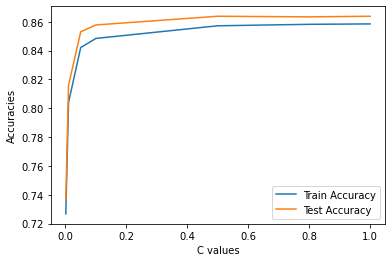

confusion matrix: 

 [[1013  168]
 [ 148  991]] 


classification report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1181
           1       0.86      0.87      0.86      1139

    accuracy                           0.86      2320
   macro avg       0.86      0.86      0.86      2320
weighted avg       0.86      0.86      0.86      2320



In [73]:
udersampling_d_majority_class(imbal_enc, y)

## 2. Over sampling the minority class ...


In [74]:
def oversampling_d_minority_class(encoded_df, label):
    y = label
    zeros = encoded_df[encoded_df[y] == 0] #the oversampled
    ones = encoded_df[encoded_df[y] == 1] #the undersampled
    
    zeros_count, ones_count = encoded_df[y].value_counts()
    
    #undersampling the zeros to same values as 1's
    zeros.sample(ones_count).shape #brought zeros to same values as 1's

    ones_oversampled = ones.sample(zeros_count, replace = True, random_state = 0) 
    
    #so, for oversampling, i have
    print('now equally scaled as: ', zeros.shape , ones_oversampled.shape)
    print('\n')
    #concatenating -- the new scaled dataframe:
    dataframe_new = pd.concat([zeros, ones_oversampled], axis = 0)
    
    print('shape of new equally scaled new dataframe: \n', dataframe_new.shape)
    print('\n')
    y = label
    features = dataframe_new.drop(y, axis = 1)
    target = dataframe_new[y]
    
    #splitting
    x_tr, x_test, y_tr, y_test = train_test_split(features, target, random_state=0)
    
    #scaling
    scaler = MinMaxScaler()
    x_tr_scaled = scaler.fit_transform(x_tr)
    x_test_scaled = scaler.transform(x_test)
    
    logistic_regression_model(x_tr_scaled, x_test_scaled, y_tr, y_test)
    Log_reg_Manip_display(x_tr_scaled, x_test_scaled, y_tr, y_test)
    cls_rprt_and_conf_matrix(x_tr_scaled, x_test_scaled, y_tr, y_test)

now equally scaled as:  (36548, 21) (36548, 21)


shape of new equally scaled new dataframe: 
 (73096, 21)


training accuracy:  0.8557513407026376
testing accuracy:  0.8570099595053081


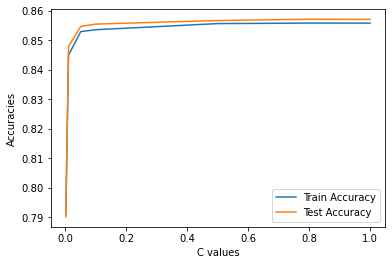

confusion matrix: 

 [[7626 1372]
 [1241 8035]] 


classification report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      8998
           1       0.85      0.87      0.86      9276

    accuracy                           0.86     18274
   macro avg       0.86      0.86      0.86     18274
weighted avg       0.86      0.86      0.86     18274



In [75]:
oversampling_d_minority_class(imbal_enc, y)

# 3. Over sampliing the minority using SMOTE


In [76]:
from imblearn.over_sampling import SMOTE

In [81]:
def using_smote(encoded_df, label, c = 1):
    y = label
    features_enc = encoded_df.drop(y, axis = 'columns')
    target = imbal_enc[y]
    
    smote =SMOTE(sampling_strategy='minority', random_state=0)
    x_sn, y_sn = smote.fit_resample(features_enc, target)
   
    #splitting..
    x_tr, x_te, y_tr, y_te = train_test_split(x_sn, y_sn, random_state = 0)
    
    #scaling
    scaler = MinMaxScaler()
    x_tr_scaled = scaler.fit_transform(x_tr)
    x_test_scaled = scaler.transform(x_te)
    
    logistic_regression_model(x_tr_scaled, x_test_scaled, y_tr, y_te, C = c)
    Log_reg_Manip_display(x_tr_scaled, x_test_scaled, y_tr, y_te)
    cls_rprt_and_conf_matrix(x_tr_scaled, x_test_scaled, y_tr, y_te)

training accuracy:  0.8797563022144395
testing accuracy:  0.8782423114807923


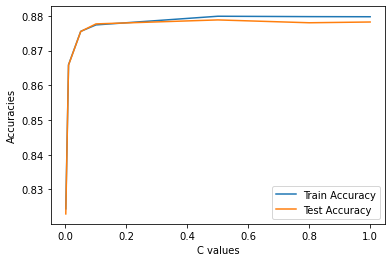

confusion matrix: 

 [[7910 1107]
 [1118 8139]] 


classification report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      9017
           1       0.88      0.88      0.88      9257

    accuracy                           0.88     18274
   macro avg       0.88      0.88      0.88     18274
weighted avg       0.88      0.88      0.88     18274



In [78]:
using_smote(imbal_enc, y)

In [79]:
#running smote again with a change in C value

training accuracy:  0.8784429608551312
testing accuracy:  0.8784612017073438


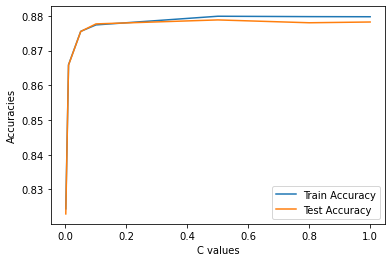

confusion matrix: 

 [[7910 1107]
 [1118 8139]] 


classification report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      9017
           1       0.88      0.88      0.88      9257

    accuracy                           0.88     18274
   macro avg       0.88      0.88      0.88     18274
weighted avg       0.88      0.88      0.88     18274



In [88]:
using_smote(imbal_enc,y, c = 0.15)